In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd


import hashlib
import json
from os import listdir
from os.path import isfile, join
import pandas as pd

%matplotlib inline

In [2]:
os.getcwd()

'/scratch/connectome/jubin/ABCD-3DCNN-jub/suicidality/testcodes'

In [2]:
global dataset, exp, dir_path

dataset='ABCD'
exp='age_scratch_13cc31.json'
model='DenseNet3D121'
dir_path = f'/scratch/connectome/jubin/result'

In [12]:
!ls $dir_path

age_transfer_test1_41ac69.json	age_transfer_test1_53c83a.json
age_transfer_test1_429851.json	model


In [160]:
jsons = ['age_scratch_13cc31.json']

In [158]:
## ===== loading json file as pandas data frame ===== ##
def load_exp_result(filename):
    list_result = []
    with open(filename, 'r') as infile:
        results = json.load(infile)
        list_result.append(results)
    df = pd.DataFrame(list_result) # .drop(columns=[])
    return df


## ===== plotting loss and accuracy graph together ===== ## 
def plot_loss_acc(df,**kwargs):
    train_losses = df['train_losses']
    train_losses = list(train_losses[0].values())[0]

    val_losses = df['val_losses']
    val_losses = list(val_losses[0].values())[0]
    
    train_accs = df['train_accs']
    train_accs = list(train_accs[0].values())[0]
    
    val_accs = df['val_accs']
    val_accs = list(val_accs[0].values())[0]
    
    ## === making dataframe for loss === ##
    loss_data = []
    
    for epoch,train_loss in enumerate(train_losses,0):
        loss_data.append({'type':'train','loss':train_loss,'epoch':epoch})

    
    for epoch,val_loss in enumerate(val_losses,0):
        loss_data.append({'type':'val','loss':val_loss,'epoch':epoch})
    
    df_loss = pd.DataFrame(loss_data)
    ## ================================== ##
    
    ## === making dataframe for acc === ##
    acc_data = []
    
    for epoch,train_acc in enumerate(train_accs,0):
        acc_data.append({'type':'train','acc':train_acc,'epoch':epoch})
    
    for epoch,val_acc in enumerate(val_accs,0):
        acc_data.append({'type':'val','acc':val_acc,'epoch':epoch})
        
    df_acc = pd.DataFrame(acc_data)
    ## ================================== ##
    
    ## === plotting == ##
    plt.rcParams["figure.figsize"] = (10,6)
    fig, axes = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.5)

    sns.lineplot(df_loss['epoch'], df_loss['loss'],hue=df_loss['type'],ax=axes[0])
    sns.lineplot(df_acc['epoch'], df_acc['acc'],hue=df_acc['type'],ax=axes[1])
    
    model = df['model'][0]
    acc_val = df['val_accs'][0]['age'][-1]
    acc_test = df['test_acc'][0]['age'][-1]
    optim = df['optim'][0]

    title_string = f"Exp name : {df.exp_name[0]}\n\
    Model structure is {model} \n\
    Acc(val/test) is {acc_val:.2f}/{acc_test:.2f} \n\
    Optimizer is {optim}"
    plt.suptitle(title_string,y=1.2)

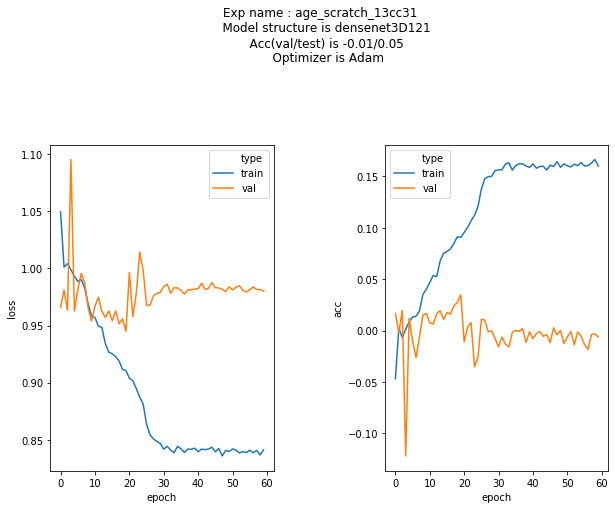

In [159]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
    file_path = dir_path+'/'+file
    df = load_exp_result(file_path)
    dl = plot_loss_acc(df)

In [161]:
jsons = ['TL_age_UKB_ABCD_10_a157cd.json']

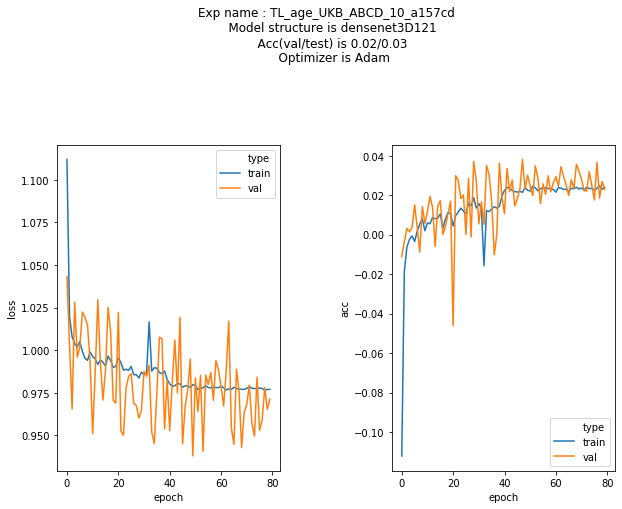

In [162]:
# file_list = glob.glob(f'{dir_path}/{exp}')
# print(file_list)
file_list = jsons
for file in file_list:
    file_path = dir_path+'/'+file
    df = load_exp_result(file_path)
    dl = plot_loss_acc(df)

In [124]:
df.columns

Index(['train_losses', 'train_accs', 'val_losses', 'val_accs', 'train_acc',
       'val_acc', 'test_acc', 'model', 'val_size', 'test_size', 'resize',
       'train_batch_size', 'val_batch_size', 'in_channels', 'optim', 'lr',
       'weight_decay', 'exp_name', 'cat_target', 'num_target',
       'confusion_matrix', 'gpus', 'sbatch'],
      dtype='object')

In [145]:
print(f"{df['test_acc'][0].}")

{'age': [0.05385145723537843]}
